In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from wrangle import wrangle

## Acquire data usign wrangle function

In [28]:
by_week, east, west, central, south  =  wrangle()

Reading from .csv file.


In [ ]:
Since we know by by_week

In [43]:
by_week

,sales,quantity,discount,profit
order_date,,,,
2014-01-05,288.0600,8.0,1.20,-65.9901
2014-01-12,105.3140,9.0,0.40,36.6531
2014-01-19,1587.2240,34.0,1.50,320.6337
2014-01-26,1859.4000,27.0,0.00,437.2475
2014-02-02,481.2500,11.0,0.00,212.1205
...,...,...,...,...
2017-12-03,7117.5210,113.0,3.20,85.8446
2017-12-10,8637.4830,124.0,4.15,1124.6990
2017-12-17,233.5880,19.0,1.70,-151.0779


In [34]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<AxesSubplot:xlabel='order_date'>

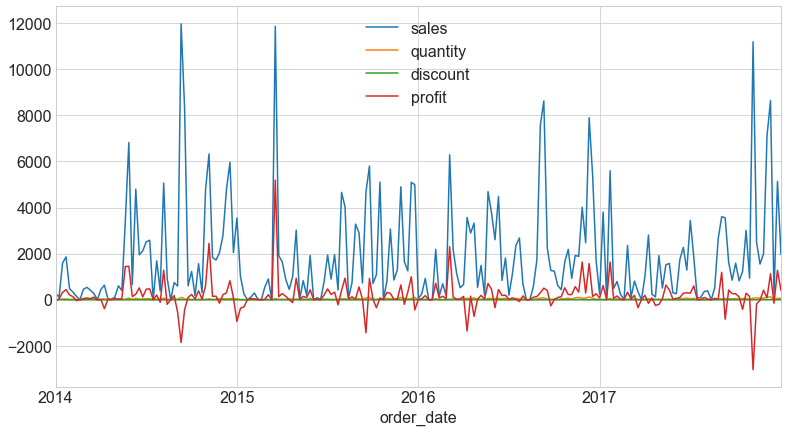

In [39]:
by_week.plot()

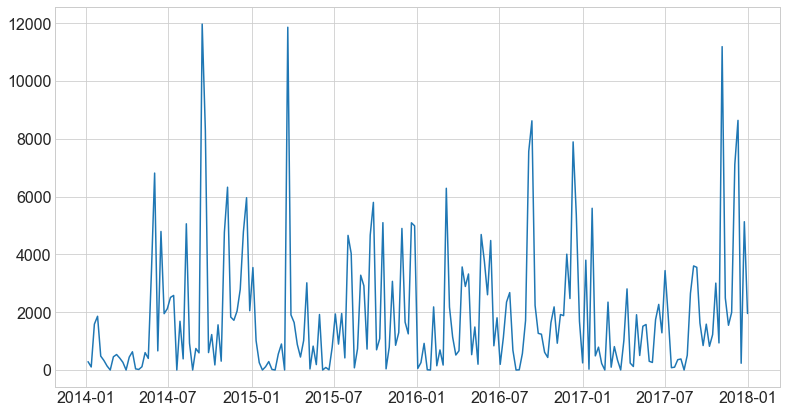

In [40]:
plt.plot(by_week.sales)

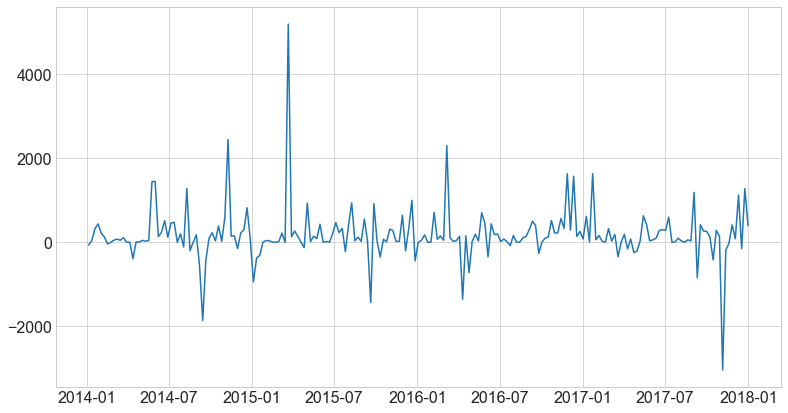

In [41]:
plt.plot(by_week.profit)

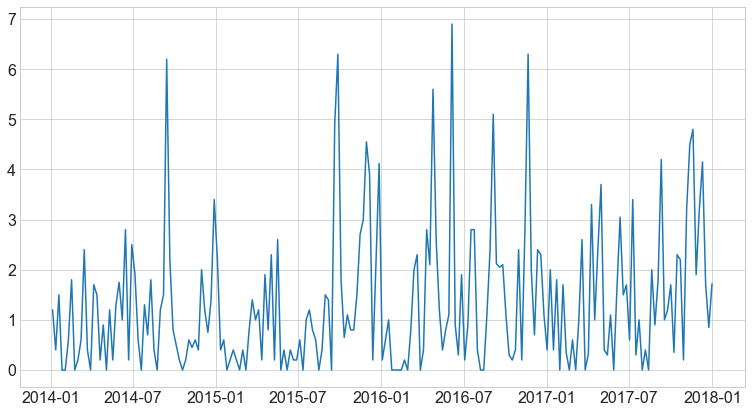

In [48]:
plt.plot(by_week.discount)

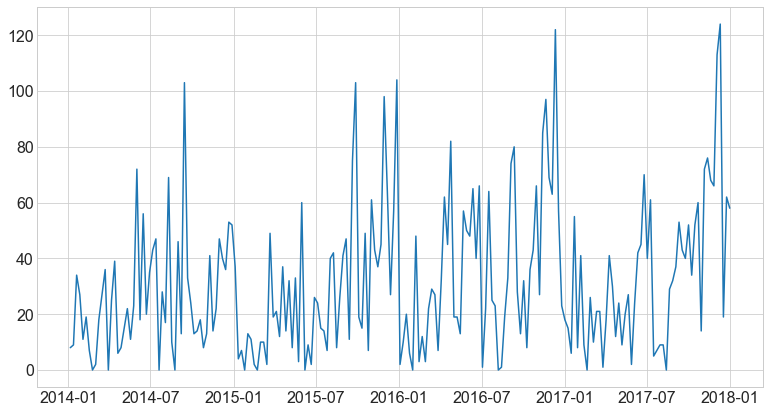

In [42]:
plt.plot(by_week.quantity)

### Takeaways:
- There seems to be seasonality: we can split by year
- Higher peaks on the second half of the year
- Discount, Quantity and Sales have similar peaks
- Profit does not look like the other three variables

## Split manually by year

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_73888/1080909730.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = by_week['2017']


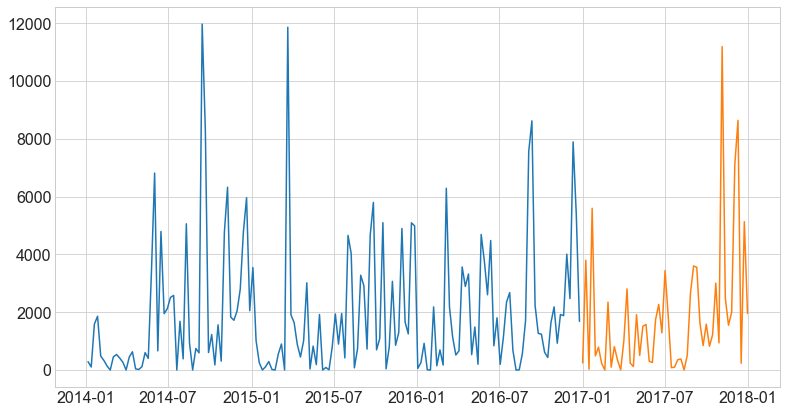

In [46]:
train = by_week[:'2016'] # 2014 - 2016 roughly 75%
test = by_week['2017'] # 2017 roughly 25%
plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)

### Assign "y" with sales

In [51]:
y = train.sales
y.head()

order_date
2014-01-05     288.060
2014-01-12     105.314
2014-01-19    1587.224
2014-01-26    1859.400
2014-02-02     481.250
Freq: W-SUN, Name: sales, dtype: float64

### Average sales by month

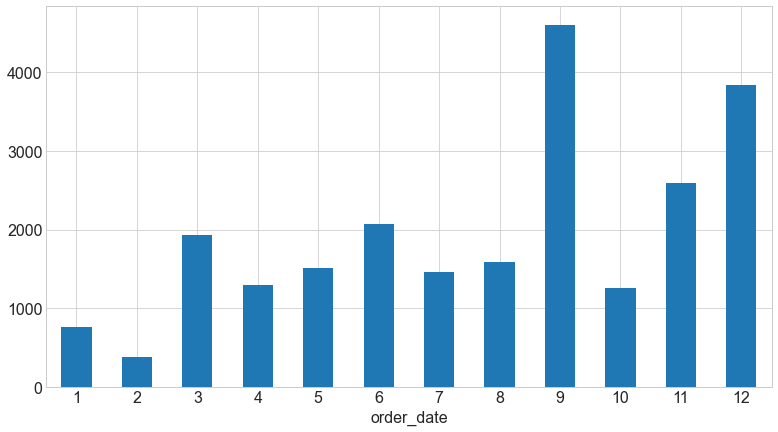

In [49]:
ax = train.groupby(train.index.month).sales.mean().plot.bar()
ax.tick_params('x', rotation=0)

<AxesSubplot:xlabel='order_date'>

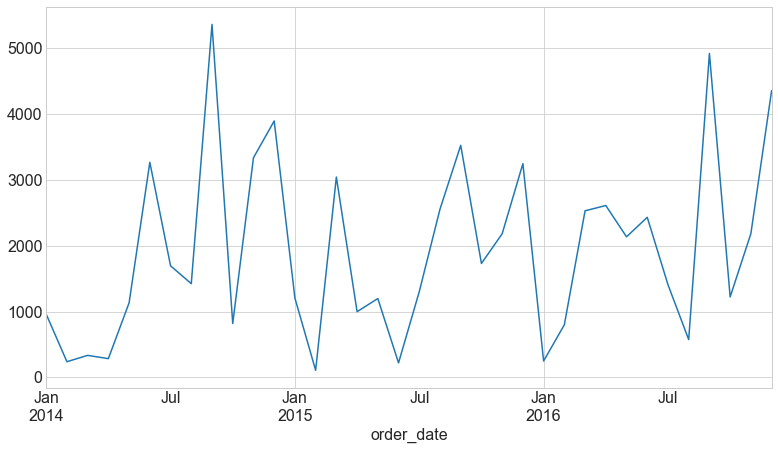

In [62]:
y.resample('M').mean().plot()

### Average sales biweekly

<AxesSubplot:xlabel='order_date'>

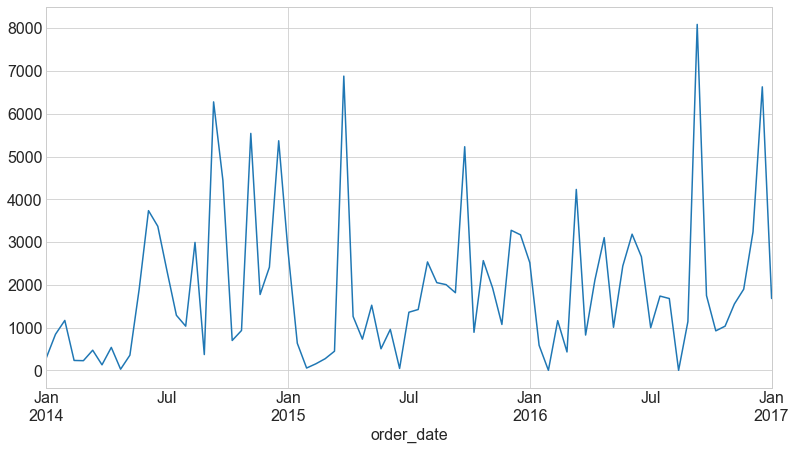

In [56]:
y.resample('2w').mean().plot()

### Average sales weekly, monthly, yearly

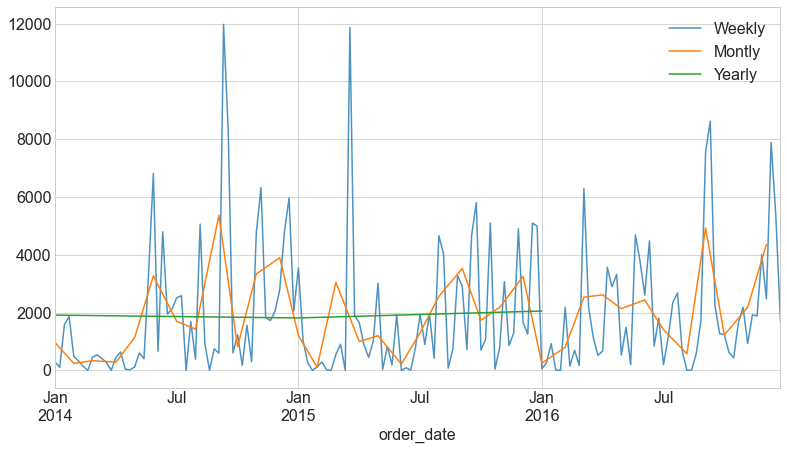

In [58]:
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### Weekly change in Sales

<AxesSubplot:xlabel='order_date'>

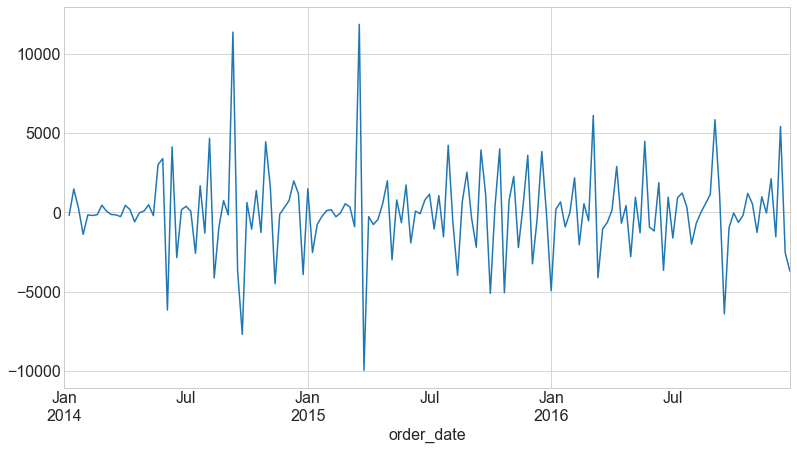

In [63]:
y.resample('W').mean().diff().plot()

### Monthly change in Sales

<AxesSubplot:xlabel='order_date'>

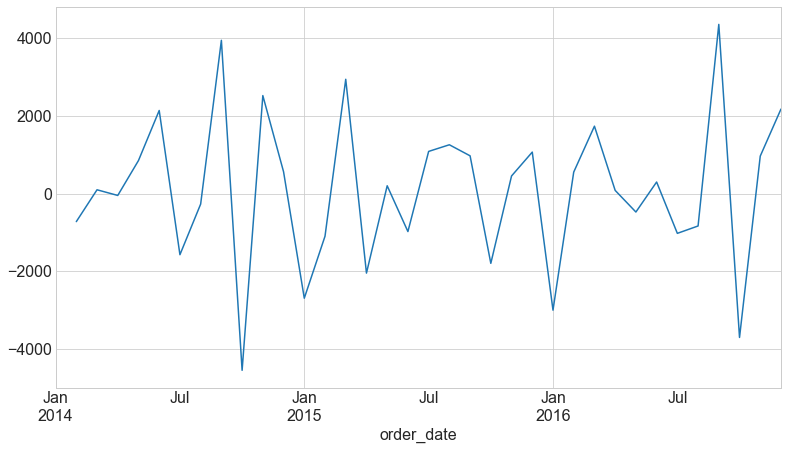

In [66]:
y.resample('M').mean().diff().plot()

### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='order_date'>

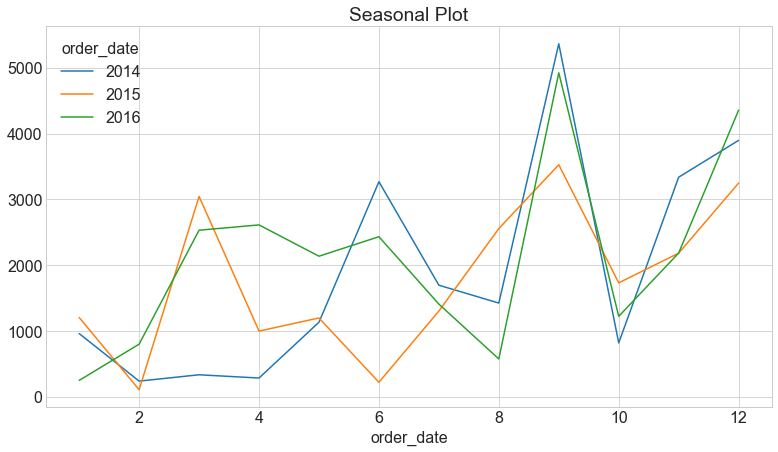

In [67]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

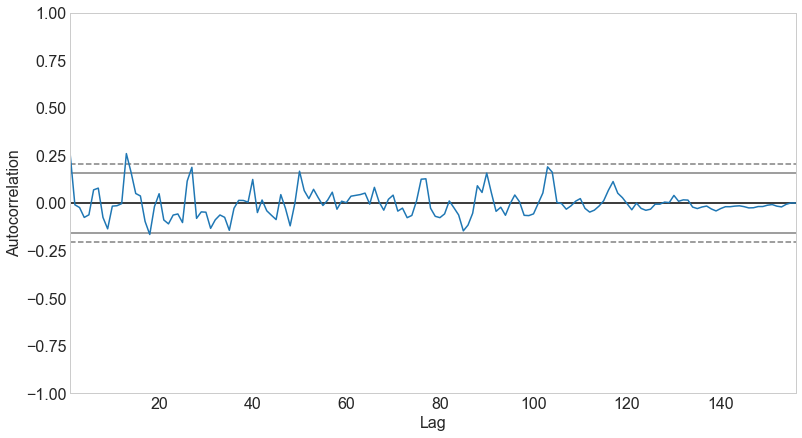

In [76]:
pd.plotting.autocorrelation_plot(train.sales.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

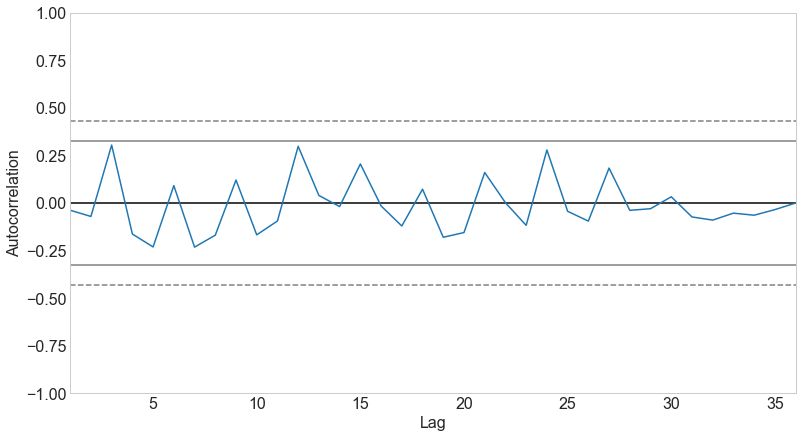

In [78]:
pd.plotting.autocorrelation_plot(train.sales.resample('M').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

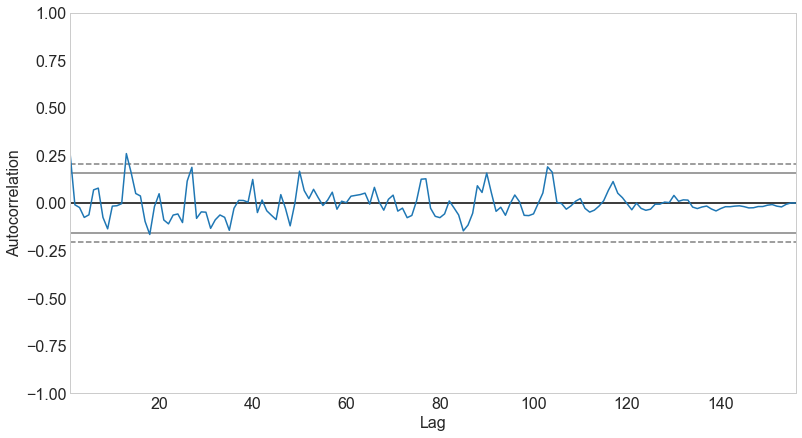

In [73]:
pd.plotting.autocorrelation_plot(y)

<AxesSubplot:xlabel='order_date'>

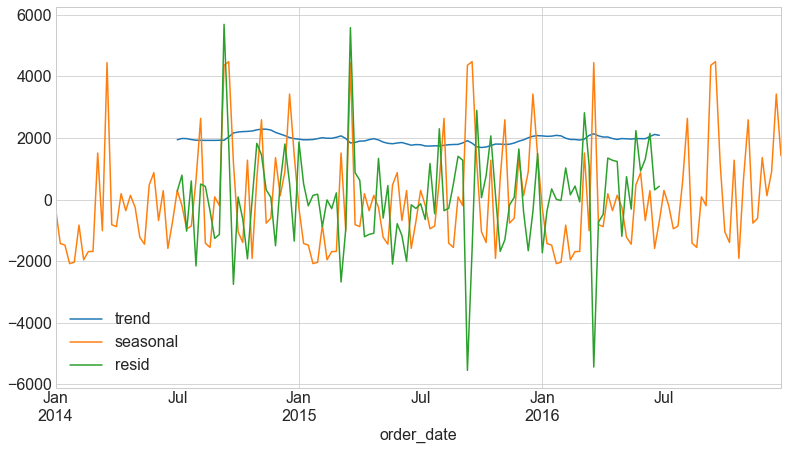

In [82]:
y = train.sales.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()


Split:
east,
west, 
central, 
south  
and make monthly box chart
weekly resample 
Various periods overtime

## East

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_73888/255684702.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = east['2017'] # 2017 roughly 25%


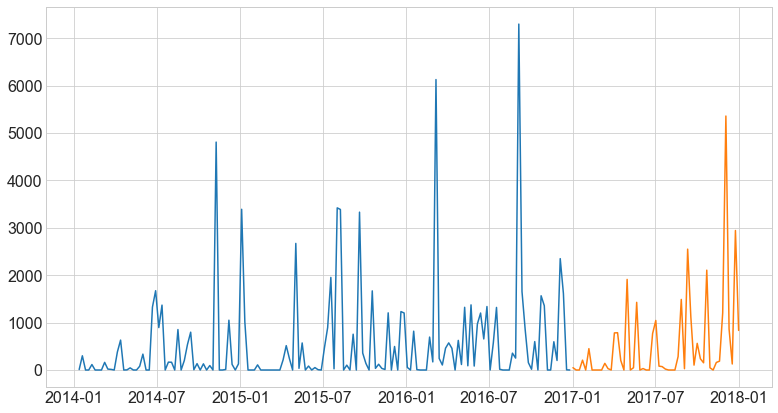

In [93]:
train = east[:'2016'] # 2014 - 2016 roughly 75%
test = east['2017'] # 2017 roughly 25%
plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)

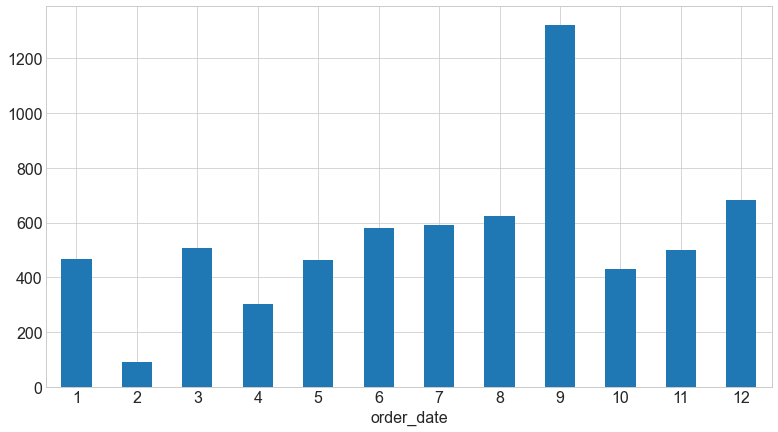

In [95]:
ax = train.groupby(train.index.month).sales.mean().plot.bar()
ax.tick_params('x', rotation=0)

In [96]:
y = train.sales
y.head()

order_date
2014-01-12      9.940
2014-01-19    299.964
2014-01-26      0.000
2014-02-02      0.000
2014-02-09    115.360
Freq: W-SUN, Name: sales, dtype: float64

<AxesSubplot:xlabel='order_date'>

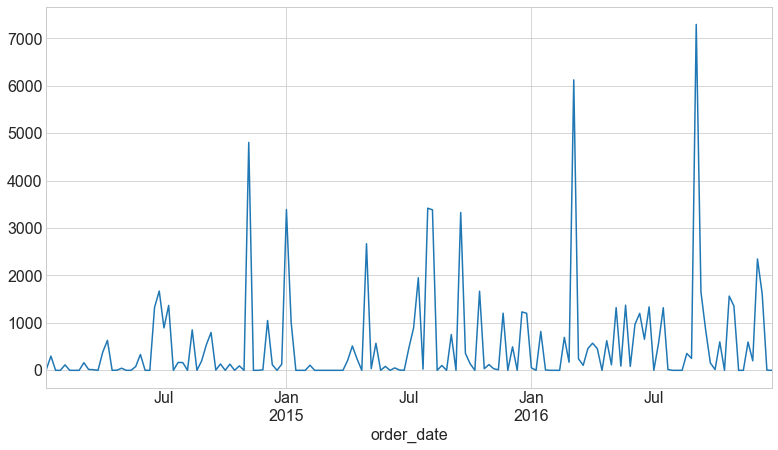

In [97]:
y.resample('W').mean().plot()

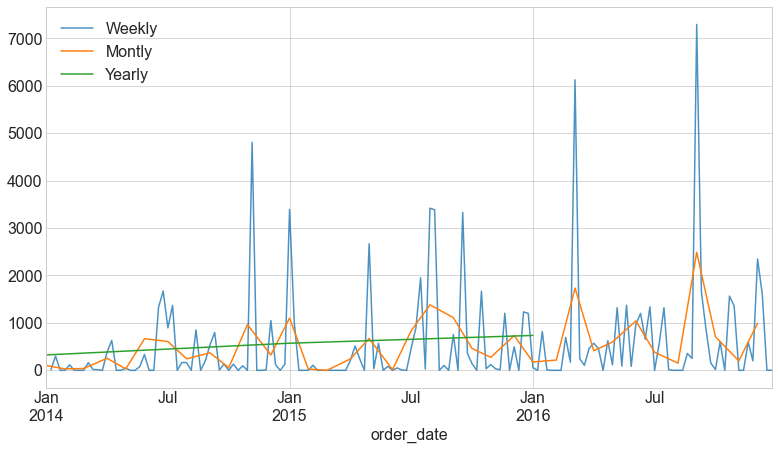

In [98]:
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

## West

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_73888/3912371684.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = west['2017'] # 2017 roughly 25%


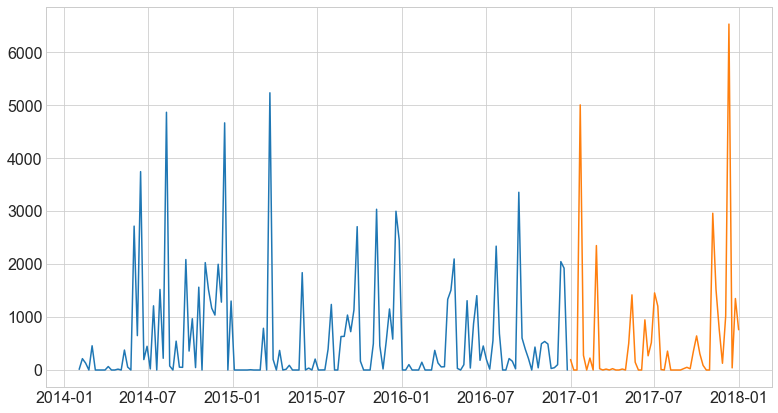

In [99]:
train = west[:'2016'] # 2014 - 2016 roughly 75%
test = west['2017'] # 2017 roughly 25%
plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)

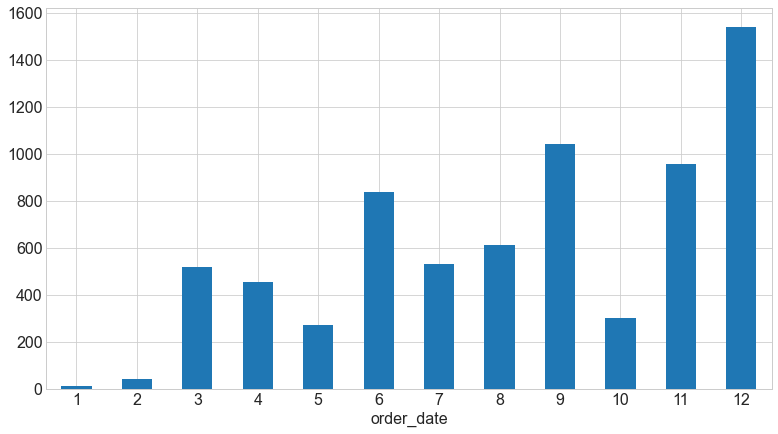

In [100]:
ax = train.groupby(train.index.month).sales.mean().plot.bar()
ax.tick_params('x', rotation=0)

In [101]:
y = train.sales
y.head()

order_date
2014-02-02     12.350
2014-02-09    214.248
2014-02-16    129.568
2014-02-23      0.000
2014-03-02    457.568
Freq: W-SUN, Name: sales, dtype: float64

<AxesSubplot:xlabel='order_date'>

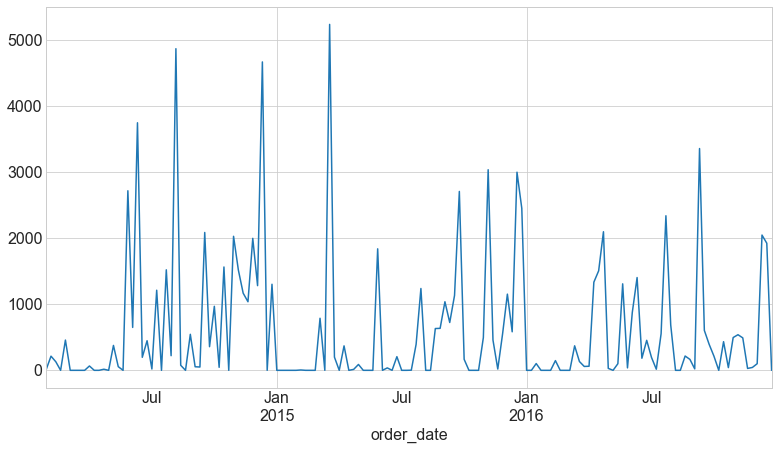

In [102]:
y.resample('W').mean().plot()

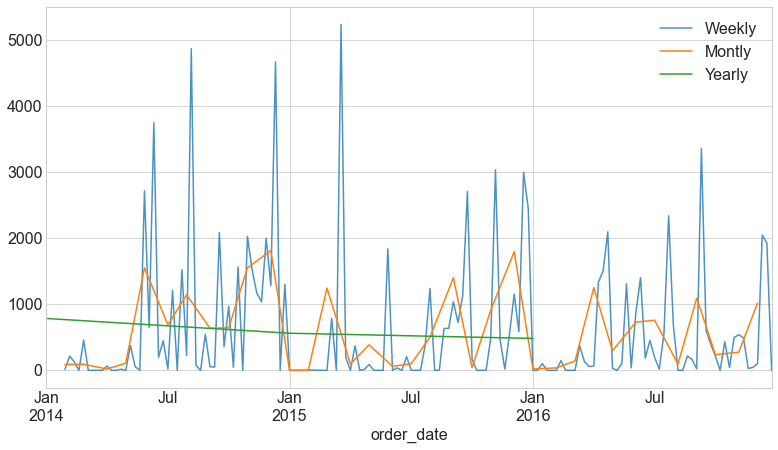

In [103]:
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

## Central

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_73888/2069745226.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = central['2017'] # 2017 roughly 25%


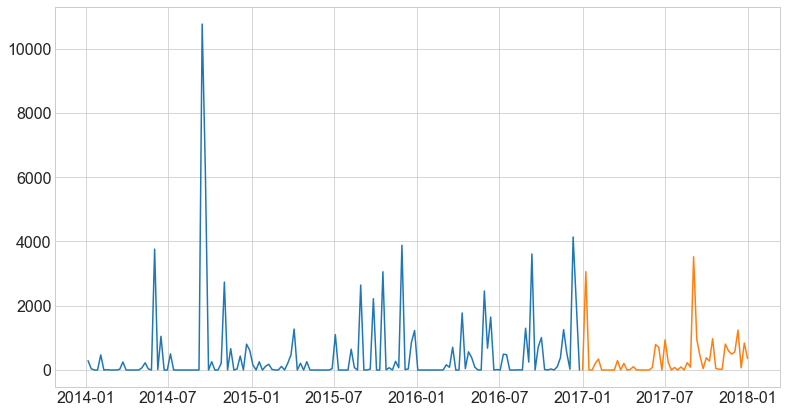

In [104]:
train = central[:'2016'] # 2014 - 2016 roughly 75%
test = central['2017'] # 2017 roughly 25%
plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)


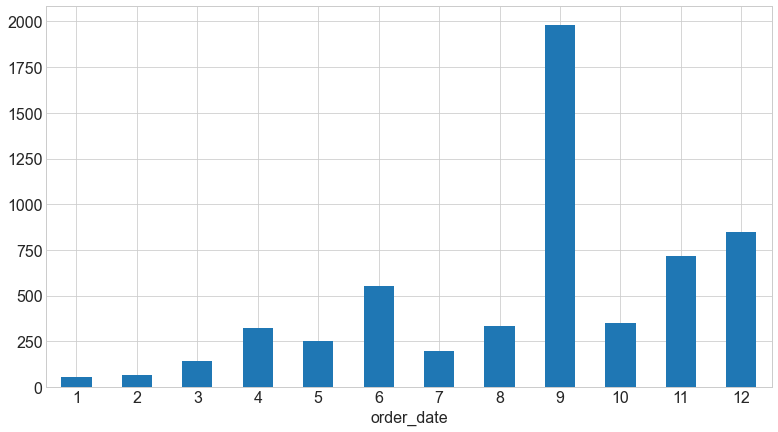

In [105]:
ax = train.groupby(train.index.month).sales.mean().plot.bar()
ax.tick_params('x', rotation=0)

In [106]:
y = train.sales
y.head()

order_date
2014-01-05    288.060
2014-01-12     40.544
2014-01-19      0.000
2014-01-26      0.000
2014-02-02    468.900
Freq: W-SUN, Name: sales, dtype: float64

<AxesSubplot:xlabel='order_date'>

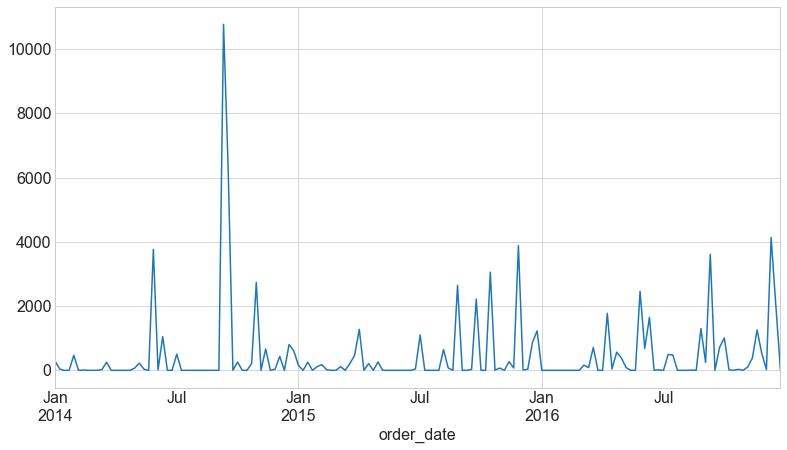

In [107]:
y.resample('W').mean().plot()

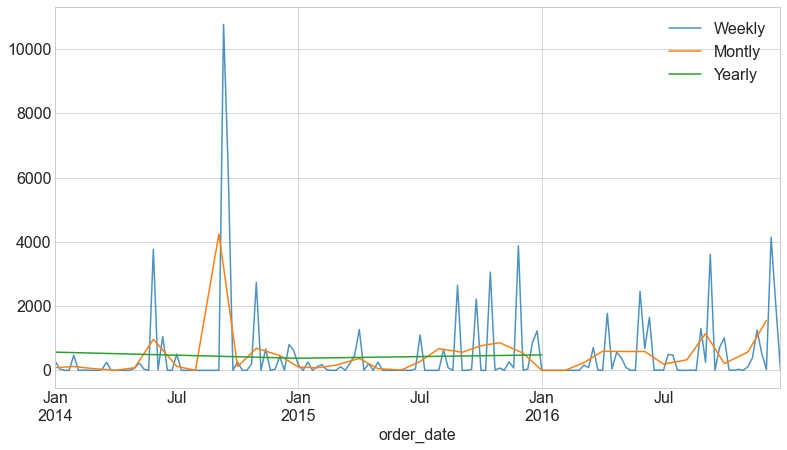

In [108]:
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

## South

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_73888/3248188531.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = south['2017'] # 2017 roughly 25%


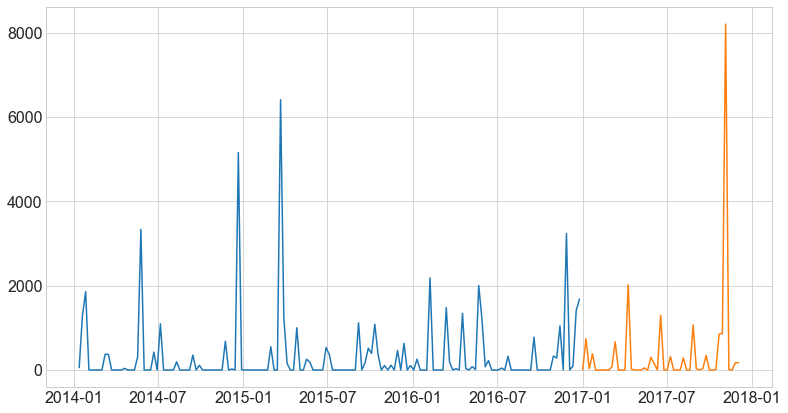

In [109]:
train = south[:'2016'] # 2014 - 2016 roughly 75%
test = south['2017'] # 2017 roughly 25%
plt.plot(train.index, train.sales)
plt.plot(test.index, test.sales)

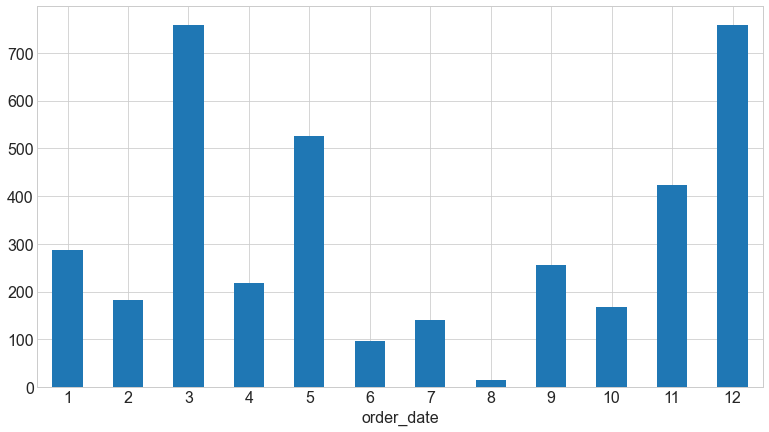

In [110]:
ax = train.groupby(train.index.month).sales.mean().plot.bar()
ax.tick_params('x', rotation=0)

In [111]:
y = train.sales
y.head()

order_date
2014-01-12      54.83
2014-01-19    1287.26
2014-01-26    1859.40
2014-02-02       0.00
2014-02-09       0.00
Freq: W-SUN, Name: sales, dtype: float64

<AxesSubplot:xlabel='order_date'>

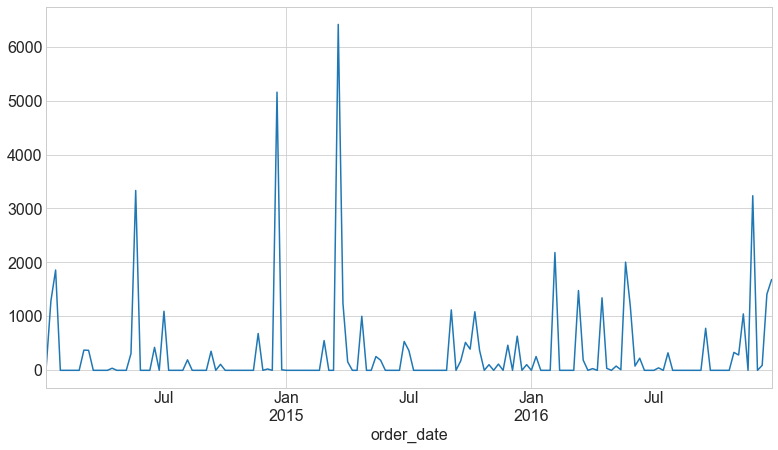

In [112]:
y.resample('W').mean().plot()

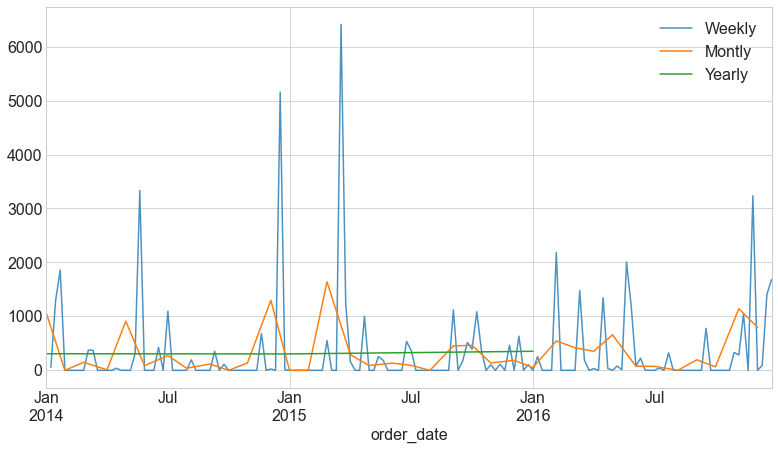

In [113]:
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()